In [1]:
import os
import pandas as pd 
import csv
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts 
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

In [2]:
final_census_data = pd.read_csv("final_census_data.csv")
organized_census_data = pd.read_csv("organized_census_data.csv")
organized_census_data['Year'].astype(int)
organized_census_data

,Year,City,Household Income,Population,Per Capita Income,Poverty Count,Unemployment Count,State ID,Place ID
0,2011,"Charlotte city, North Carolina",53146.0,722234.0,31667.0,106321.0,40293.0,37,12000
1,2011,"San Francisco city, California",72947.0,797983.0,46777.0,96801.0,36368.0,6,67000
2,2012,"Charlotte city, North Carolina",52916.0,740931.0,31653.0,116542.0,43508.0,37,12000
3,2012,"San Francisco city, California",73802.0,807755.0,47278.0,104784.0,39369.0,6,67000
4,2013,"Charlotte city, North Carolina",52375.0,757278.0,31556.0,127166.0,47673.0,37,12000
5,2013,"San Francisco city, California",75604.0,817501.0,48486.0,108306.0,41148.0,6,67000
6,2014,"Charlotte city, North Carolina",53274.0,774807.0,31844.0,131826.0,46895.0,37,12000
7,2014,"San Francisco city, California",78378.0,829072.0,49986.0,108328.0,38318.0,6,67000
8,2015,"Charlotte city, North Carolina",53637.0,792137.0,32254.0,131404.0,42383.0,37,12000
9,2015,"San Francisco city, California",81294.0,840763.0,52220.0,109524.0,34785.0,6,67000


In [3]:
charlotte_data = organized_census_data.loc[(organized_census_data['City']=='Charlotte city, North Carolina')]
san_francisco_data = organized_census_data.loc[(organized_census_data['City']=='San Francisco city, California')]
charlotte_data

,Year,City,Household Income,Population,Per Capita Income,Poverty Count,Unemployment Count,State ID,Place ID
0,2011,"Charlotte city, North Carolina",53146.0,722234.0,31667.0,106321.0,40293.0,37,12000
2,2012,"Charlotte city, North Carolina",52916.0,740931.0,31653.0,116542.0,43508.0,37,12000
4,2013,"Charlotte city, North Carolina",52375.0,757278.0,31556.0,127166.0,47673.0,37,12000
6,2014,"Charlotte city, North Carolina",53274.0,774807.0,31844.0,131826.0,46895.0,37,12000
8,2015,"Charlotte city, North Carolina",53637.0,792137.0,32254.0,131404.0,42383.0,37,12000
10,2016,"Charlotte city, North Carolina",55599.0,808834.0,33050.0,125793.0,38623.0,37,12000
12,2017,"Charlotte city, North Carolina",58202.0,826060.0,34687.0,121412.0,34115.0,37,12000
14,2018,"Charlotte city, North Carolina",60886.0,841611.0,36426.0,115699.0,29544.0,37,12000


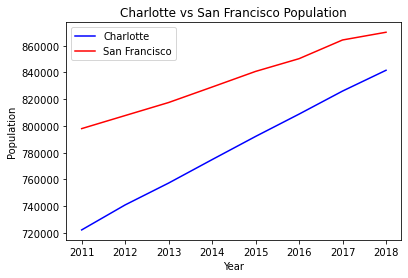

In [4]:
#Population Line Graph
charlotte_plot = plt.plot(charlotte_data['Year'], charlotte_data['Population'] , color='blue', label = 'Charlotte')
san_francisco_plot = plt.plot(san_francisco_data['Year'], san_francisco_data['Population'] , color='red', 
                              label = 'San Francisco')

plt.legend(loc="best")

plt.title('Charlotte vs San Francisco Population')
plt.xlabel("Year")
plt.ylabel("Population")

plt.savefig("LinegraphFigs/CLT_vs_SF_Population")
plt.show()

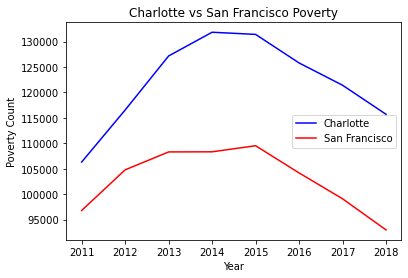

In [5]:
#Poverty Count
charlotte_plot = plt.plot(charlotte_data['Year'], charlotte_data['Poverty Count'] , color='blue', label = 'Charlotte')
san_francisco_plot = plt.plot(san_francisco_data['Year'], san_francisco_data['Poverty Count'] , color='red', 
                              label = 'San Francisco')

plt.legend(loc="best")

plt.title('Charlotte vs San Francisco Poverty')
plt.xlabel("Year")
plt.ylabel("Poverty Count")

plt.savefig("LinegraphFigs/CLT_vs_SF_Poverty")
plt.show()

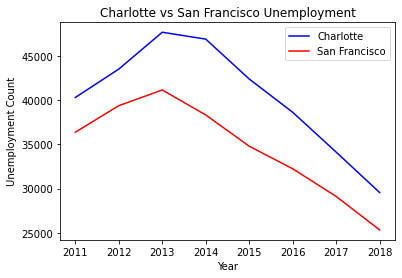

In [6]:
#Unemployment Count
charlotte_plot = plt.plot(charlotte_data['Year'], charlotte_data['Unemployment Count'] , color='blue', label = 'Charlotte')
san_francisco_plot = plt.plot(san_francisco_data['Year'], san_francisco_data['Unemployment Count'] , color='red', 
                              label = 'San Francisco')

plt.legend(loc="best")

plt.title('Charlotte vs San Francisco Unemployment')
plt.xlabel("Year")
plt.ylabel("Unemployment Count")

plt.savefig("LinegraphFigs/CLT_vs_SF_Unemployment")
plt.show()

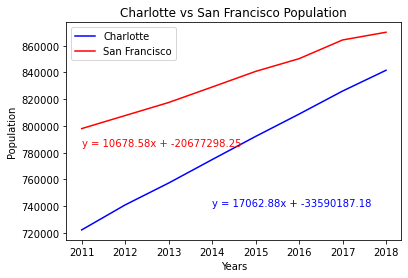

In [7]:
#Charlotte Population Linear Regression
charlotte_plot = plt.plot(charlotte_data['Year'], charlotte_data['Population'] , color='blue', label = 'Charlotte')
san_francisco_plot = plt.plot(san_francisco_data['Year'], san_francisco_data['Population'] , color='red', 
                              label = 'San Francisco')

plt.legend(loc="best")

plt.title('Charlotte vs San Francisco Population')
plt.xlabel("Year")
plt.ylabel("Population")

# years= [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
# years = pd.DataFrame(years)

clt_x_values = charlotte_data['Year']
clt_y_values = charlotte_data["Population"]
slope, intercept, rvalue, pvalue, stderr = linregress(clt_x_values, clt_y_values)
regress_values = clt_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(2014,740000),fontsize=10,color="blue")

sf_x_values = san_francisco_data['Year']
sf_y_values = san_francisco_data["Population"]
slope, intercept, rvalue, pvalue, stderr = linregress(sf_x_values, sf_y_values)
regress_values = clt_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(2011,785000),fontsize=10,color="red")

plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Charlotte vs San Francisco Population')
plt.savefig("LinegraphFigs/Linear_Regression")
plt.show()

In [8]:
clt_pop = charlotte_data[['Year','Population']]
clt_prediction = []
years= [2019,2020,2021,2022,2023,2024,2025,2026,2027,2028]
for a in years:
    y = round(((17062.88 *a) + -33590187.18),0)
    clt_prediction.append(y)

clt_prediction = pd.DataFrame(clt_prediction)
clt_prediction['Year'] = years
clt_prediction = clt_prediction.rename(columns={0 :'Population'})
clt_prediction= clt_pop.append(clt_prediction)
clt_prediction

,Year,Population
0,2011,722234.0
2,2012,740931.0
4,2013,757278.0
6,2014,774807.0
8,2015,792137.0
10,2016,808834.0
12,2017,826060.0
14,2018,841611.0
0,2019,859768.0
1,2020,876830.0


In [9]:
sf_pop = san_francisco_data[['Year','Population']]
sf_prediction = []

years= [2019,2020,2021,2022,2023,2024,2025,2026,2027,2028]
for b in years:
    y = round(((10678.58 * b )+ -20677298.25),0)
    sf_prediction.append(y)

sf_prediction = pd.DataFrame(sf_prediction)
sf_prediction['Year'] = years
sf_prediction = sf_prediction.rename(columns={0 :'Population'})
sf_prediction= sf_pop.append(sf_prediction)
sf_prediction

,Year,Population
1,2011,797983.0
3,2012,807755.0
5,2013,817501.0
7,2014,829072.0
9,2015,840763.0
11,2016,850282.0
13,2017,864263.0
15,2018,870044.0
0,2019,882755.0
1,2020,893433.0


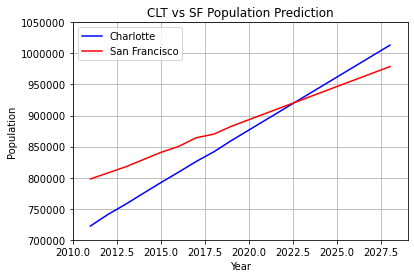

In [10]:
#Charlotte Population Linear Regression
charlotte_plot = plt.plot(clt_prediction['Year'], clt_prediction['Population'] , color='blue', label = 'Charlotte')
san_francisco_plot = plt.plot(sf_prediction['Year'], sf_prediction['Population'] , color='red', 
                              label = 'San Francisco')

plt.legend(loc="best")

plt.title('CLT vs SF Population Prediction')
plt.xlabel("Year")
plt.ylabel("Population")
plt.xlim (2010,2029)
plt.ylim (700000,1050000)
plt.ticklabel_format(useOffset=False, style='plain')
plt.grid()
plt.savefig("LinegraphFigs/Population_Prediction")
plt.show()